# Heart Disease Indicator Analysis

## 1. Introduction

**Objective:** Explore possible indicators for heart diseases.

**Questions:**
1. Which age range are you most likely to have heart issues?
2. Do the smoking habits differ between people with and without heart issues?
3. Which machine learning model among LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier is the most suitable for predicting heart issues?


## 2. Selection of Datasets

**DataSet:** 'Heart Disease Health Indicators Dataset' from Kaggle.

**Data:**
- [Heart Disease Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)
    - This is a cleaned and filtered dataset that is specific to heart disease in 2015. 
    - 253,680 survey responses from cleaned BRFSS 2015 dataset.
    - Optimized for binary classifications for heart disease. '
    - Strong class imbalance. 
        - 229,787 people have not had heart disease while 23,893 have had heart disease.


- Original Dataset [Behavioral Risk Factor Surveillance System](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system)
    - Collected by Center for Disease and Prevention

## 3. Methodologies

### 3.1 Data Import and Cleaning

- Use Pandas to:
  - Filter dataset.
  - Apply `groupby()` method for grouping certain rows based on a value of another column 
- Use Matplotlib and seaborn for visualization.

### 3.2 Machine Learning Models

- For Q3, "Which machine learning model among LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier is the most suitable for predicting heart issues?"
- Sklearn models below were picked based on their suitability for binary classifications:

#### 3.2.1 Logistic Regression

- Nature: Logistic Regression models the probability that a given instance belongs to a particular class.
- Use Case for Binary: Ideal for binary classification tasks.
- Strengths for Binary: Well-suited for linear relationships, provides interpretable coefficients, and outputs probabilities.
- Considerations: Assumes a linear relationship between features and log-odds, which might limit its ability to analyze non-linear patterns.

#### 3.2.2 RandomForestClassifier

- Nature: RandomForestClassifier is a group of decision trees that work together to make predictions.
- Use Case for Binary: Effective for binary classification tasks due to its ability to capture complex non-linear relationships.
- Strengths for Binary: Robust, handles feature interactions well, and can deal with imbalanced datasets.
- Considerations: Computationally intensive for large datasets, and the interpretability of the individual trees may be limited.

#### 3.2.3 XGBClassifier (XGBoost)

- Nature: Gradient boosting framework that builds a group of weak learners.
- Use Case for Binary: Well-suited for binary classification tasks and often outperforms other algorithms.
- Strengths for Binary: High predictive performance, handles non-linear relationships well, and includes regularization to prevent overfitting.
- Considerations: May require tuning of hyperparameters.

#### 3.2.4 KNeighborsClassifier

- Nature: Classifications of instances based on the majority class of their k-nearest neighbors.
- Use Case for Binary: Suitable for binary classification tasks, especially when local patterns in the data are important.
- Strengths for Binary: Simple conceptually, non-linear relationships are implicitly captured.
- Considerations: Sensitive to the choice of k, computationally expensive for large datasets, and may not perform well in high-dimensional spaces.

### 3.3 Dataset Division:

  - Train (90%) and test (10%) subsets.
  - Input and output sets.
    - Input: ['HighBP,	HighChol,	CholCheck,	BMI,	Smoker,	Stroke,	Diabetes,	PhysActivity,	HvyAlcoholConsump,	AnyHealthcare,	NoDocbcCost,	GenHlth	MentHlth,	PhysHlth,	DiffWalk,	Sex,	Age']
        - Columns used for the input set are chosen based on information that is commonly asked or measured at doctor's visits. 
        - Columns that are ignored are ['Fruits', 'Veggies', 'Education', 'Income']
    - Output: ['HeartDiseaseorAttack']
    
### 3.4 Model Training:

  - Train subset used for model training with sklearn machine learning models.
  - Test set evaluates prediction accuracy.
  
### 3.5 Handling Imbalance: 

- **SMOTE (Synthetic Minority Over-sampling Technique):** 
    - addresses class imbalance in binary classification tasks.
    - designed for the minority class, SMOTE generates synthetic. 
    - By introducing synthetic examples, SMOTE helps balance class distribution, enhancing the model's ability to learn from the minority class and improving overall classification performance. 
        
### 3.6 Evaluation Metrics with report:

The classification report provides performance metrics for a binary classification model. Each row represents a class (0 or 1), and the columns include precision, recall, and F1-score. 

- **Precision:** The ratio of true positive predictions to the total predicted positives, indicating the accuracy of positive predictions.
- **Recall:** The ratio of true positive predictions to the total actual positives, measuring the model's ability to capture all positive instances.
- **F1-score:** The harmonic mean of precision and recall, offering a balanced assessment of a model's performance.


### 3.7 Visualization with Confusion Matrix

A confusion matrix is a table that provides a detailed summary of the performance of a classification model. It compares predicted labels against actual labels, categorizing instances into four outcomes:

- **True Positive (TP):** Instances correctly predicted as positive.
- **True Negative (TN):** Instances correctly predicted as negative.
- **False Positive (FP):** Instances incorrectly predicted as positive.
- **False Negative (FN):** Instances incorrectly predicted as negative.


## 4. Results

Import the dataset

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

# import the data
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


### 4.1. Which age range are you most likely to have heart issues?

In [3]:
# Only choosing rows that have the condition 'HeartDiseaseorAttack' == 1
heart_disease_data = data[data['HeartDiseaseorAttack'] == 1]

# Avoiding SettingWithCopyWarning
heart_disease_data = heart_disease_data.copy()

# Mapping the age numbers from 1 to 14 to Age ranges
heart_disease_data['Age_Range'] = pd.cut(
    data['Age'],
    bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    labels=[
        'Age 18-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
        'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
        'Age 70-74', 'Age 75-79', 'Age 80 or older'
    ],
    include_lowest=True
)


# Group by 'Age_Range' and count the frequency of 'HeartDiseaseorAttack = 1'
frequency_by_age = heart_disease_data.groupby('Age_Range').size().reset_index(name='Frequency')

print(frequency_by_age)

import seaborn as sns
import matplotlib.pyplot as plt


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(12, 6), dpi=400)
ax = sns.barplot(x='Age_Range', y='Frequency', data=frequency_by_age, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Frequency of Heart Disease by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


          Age_Range  Frequency
0         Age 18-24         83
1         Age 25-29        126
2         Age 30-34        193
3         Age 35-39        351
4         Age 40-44        712
5         Age 45-49       1425
6         Age 50-54       2253
7         Age 55-59       3358
8         Age 60-64       4193
9         Age 65-69       3947
10        Age 70-74       3093
11        Age 75-79       4159
12  Age 80 or older          0


<Figure size 4800x2400 with 1 Axes>

### 4.2. Do the smoking habits differ between people with and without heart issues?

- Helper function to plot the pie chart

In [4]:
import matplotlib.pyplot as plt
def plot_pie_chart(percentage_by_smoker, name):
    # Pie chart
    labels = percentage_by_smoker.index
    sizes = percentage_by_smoker.values
    colors = ['lightcoral', 'lightskyblue']
    
    plt.figure(figsize=(3,3), dpi=200)
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Percentage of Smokers ' + name)
    plt.show()

#### 4.2.1. How many people with a heart disease smoke?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


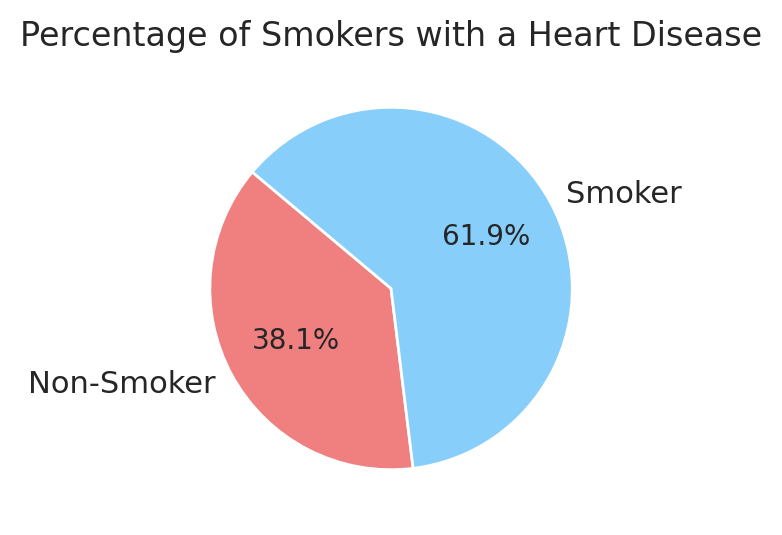

In [5]:
heart_disease_data = data[data['HeartDiseaseorAttack'] == 1]
heart_disease_data['Smoker_Label'] = heart_disease_data['Smoker'].map({1.0: 'Smoker', 0.0: 'Non-Smoker'})

frequency_by_smoker = heart_disease_data.groupby('Smoker_Label').size().reset_index(name='Frequency')

# Calculate percentages
total_cases = len(heart_disease_data)
percentage_by_smoker = heart_disease_data.groupby('Smoker_Label').size() / total_cases * 100

plot_pie_chart(percentage_by_smoker, 'with a Heart Disease')

#### 4.2.2. How many people without a heart disease smoke?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


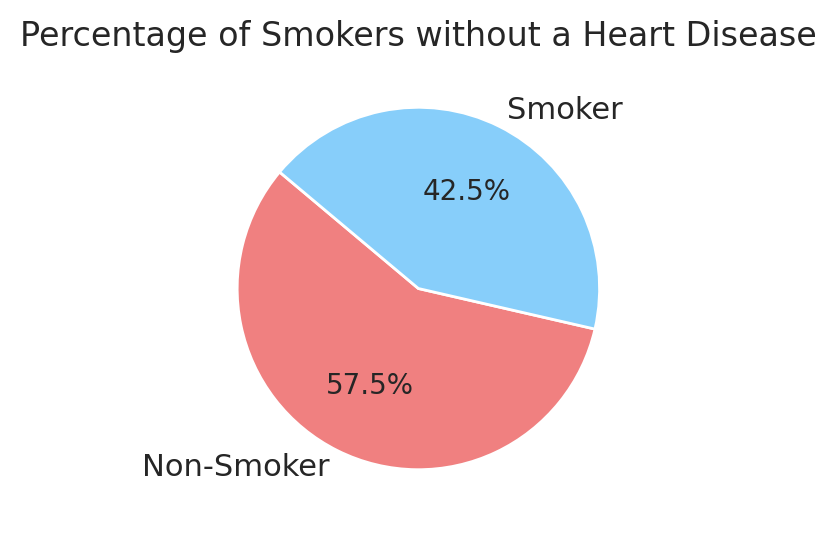

In [6]:
non_heart_disease_data = data[data['HeartDiseaseorAttack'] == 0]
non_heart_disease_data['Smoker_Label'] = non_heart_disease_data['Smoker'].map({1.0: 'Smoker', 0.0: 'Non-Smoker'})

# Calculate percentages
total_cases = len(heart_disease_data)
percentage_by_smoker = non_heart_disease_data.groupby('Smoker_Label').size() / total_cases * 100

plot_pie_chart(percentage_by_smoker, 'without a Heart Disease')

### 4.3. Can we accurately predict the anxiety, depression, and insomnia level based on their music taste or frequency using machine learning models?

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_performance(y_true, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4.5), dpi=200)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y_true, y_pred)
    return report

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

def create_train_model(X, y, model):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Apply SMOTE to the training set.
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Train your machine learning model on the resampled training set.
    model.fit(X_train_res, y_train_res)

    # Test your model on the testing set.
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: ", accuracy)
        
    return [predictions, y_test]

#### 4.3.1. LogisticRegressor

Accuracy:  0.7552822453484705


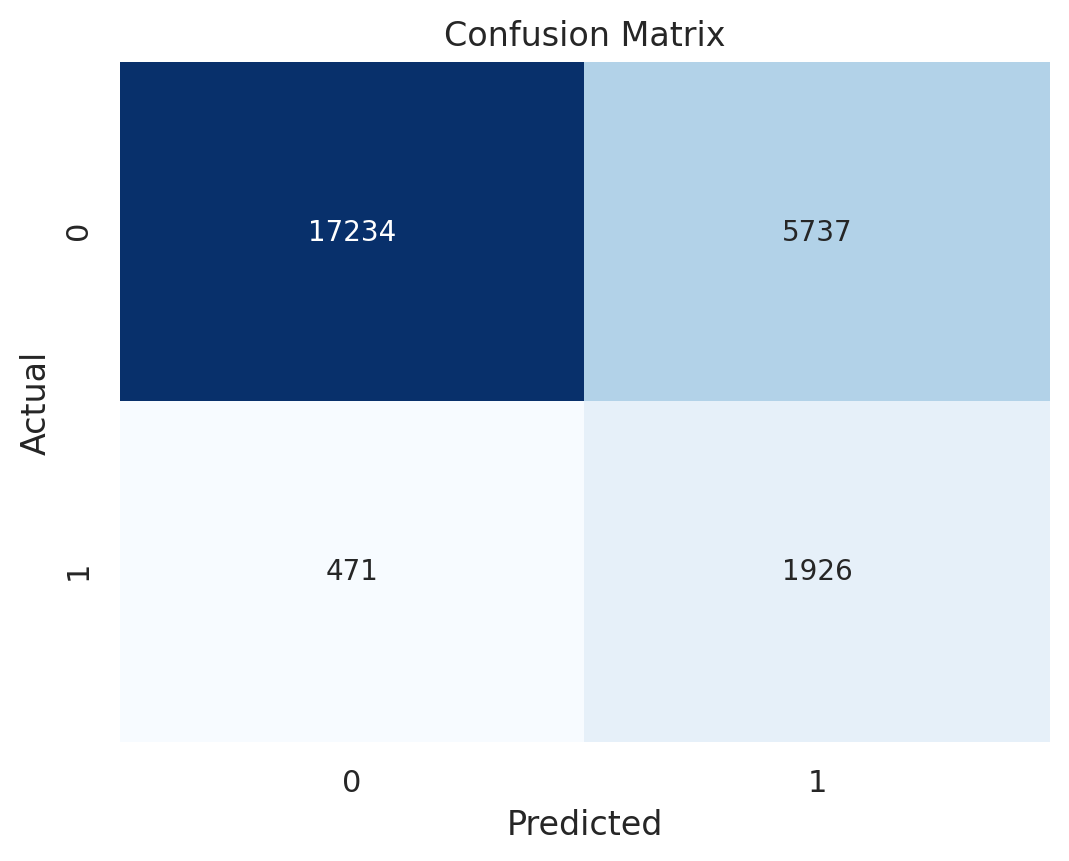

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     22971
         1.0       0.25      0.80      0.38      2397

    accuracy                           0.76     25368
   macro avg       0.61      0.78      0.62     25368
weighted avg       0.91      0.76      0.80     25368



In [9]:
from sklearn.linear_model import LogisticRegression

# Extract features (X) and target variable (y)
X = data.drop(['HeartDiseaseorAttack', 'Education', 'Income', 'Fruits', 'Veggies'], axis=1)
y = data['HeartDiseaseorAttack']

model = LogisticRegression(max_iter=500)

predictions, y_test = create_train_model(X, y, model)
report = visualize_performance(y_test, predictions)
print("Classification Report:\n", report)

#### 4.3.2. XBGClassifier

Accuracy:  0.8956953642384106


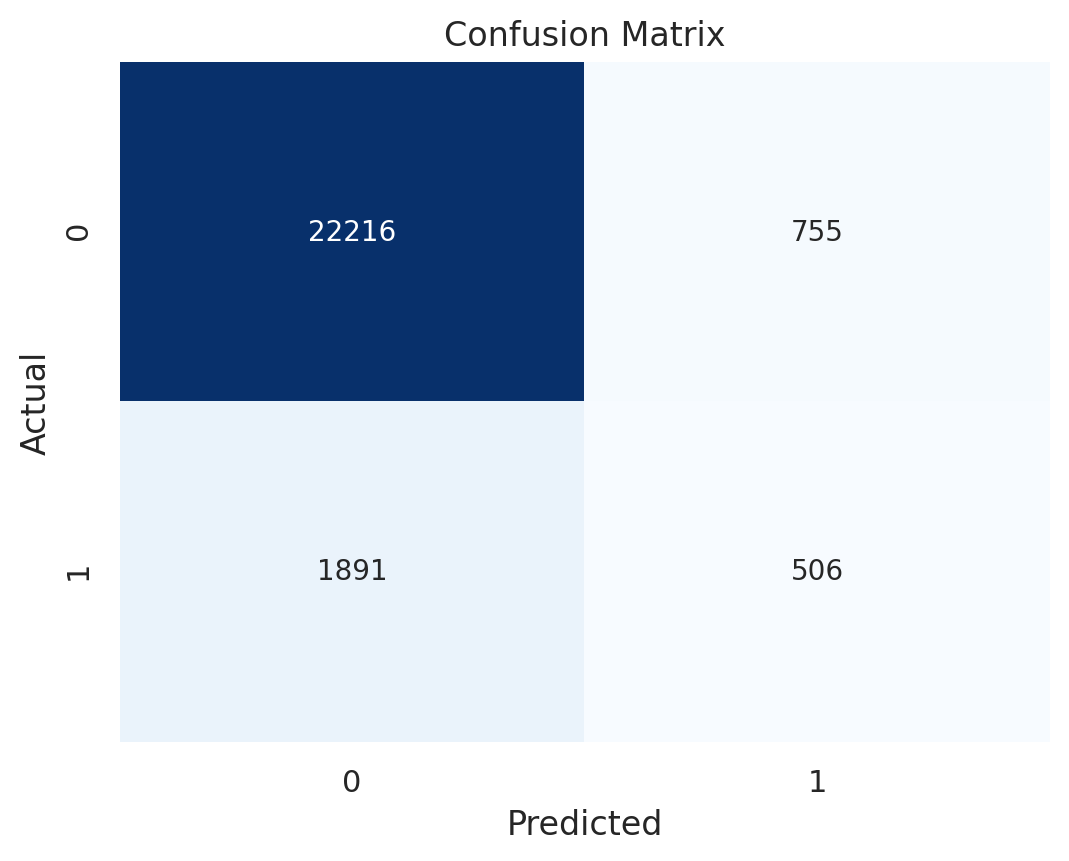

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     22971
         1.0       0.40      0.21      0.28      2397

    accuracy                           0.90     25368
   macro avg       0.66      0.59      0.61     25368
weighted avg       0.87      0.90      0.88     25368



In [10]:
from xgboost.sklearn import XGBClassifier

# Extract features (X) and target variable (y)
X = data.drop(['HeartDiseaseorAttack', 'Education', 'Income', 'Fruits', 'Veggies'], axis=1)
y = data['HeartDiseaseorAttack']

model = XGBClassifier()

predictions, y_test = create_train_model(X, y, model)
report = visualize_performance(y_test, predictions)
print("Classification Report:\n", report)

#### 4.3.3. Kth Neareast Neighbors

Accuracy:  0.7710895616524756


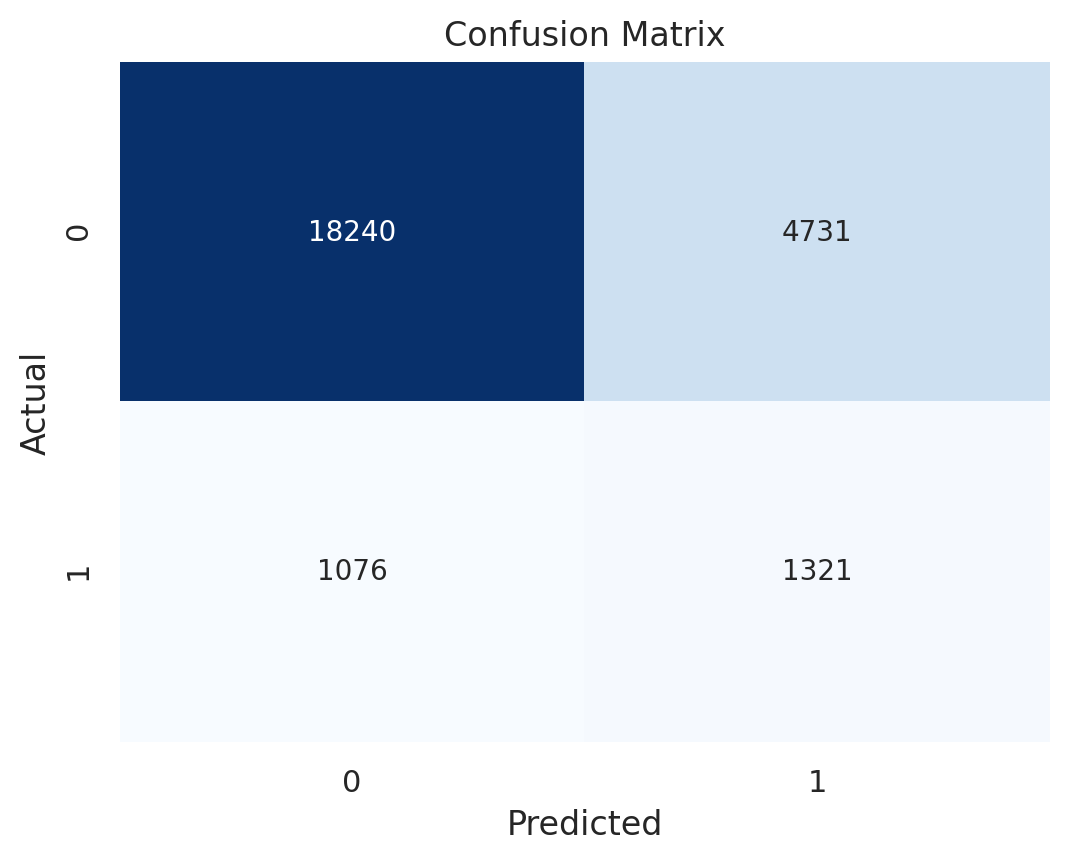

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86     22971
         1.0       0.22      0.55      0.31      2397

    accuracy                           0.77     25368
   macro avg       0.58      0.67      0.59     25368
weighted avg       0.88      0.77      0.81     25368



In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Extract features (X) and target variable (y)
X = data.drop(['HeartDiseaseorAttack', 'Education', 'Income', 'Fruits', 'Veggies'], axis=1)
y = data['HeartDiseaseorAttack']

model = KNeighborsClassifier()

predictions, y_test = create_train_model(X, y, model)
report = visualize_performance(y_test, predictions)
print("Classification Report:\n", report)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Extract features (X) and target variable (y)
# X = data.drop(['HeartDiseaseorAttack', 'Education', 'Income', 'Fruits', 'Veggies'], axis=1)
# y = data['HeartDiseaseorAttack']

# model = RandomForestClassifier()

# predictions, y_test = create_train_model(X, y, model)
# report = visualize_performance(y_test, predictions)
# print("Classification Report:\n", report)